<font size="+4">Airline Delays and Cancellations</font>

Source:
- Data: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr
- Fields: https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ


In [12]:
import altair as alt
import duckdb
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [2]:
%ls -lah

total 366200
drwxr-xr-x  15 jnatali  staff   480B Aug 24 19:20 ./
drwxr-xr-x@ 14 jnatali  staff   448B May 11 17:43 ../
-rw-r--r--@  1 jnatali  staff   8.0K Aug 24 16:48 .DS_Store
-rw-r--r--@  1 jnatali  staff   3.1K Aug 24 18:38 .gitignore
drwxr-xr-x@  4 jnatali  staff   128B Mar 10 21:51 .ipynb_checkpoints/
drwxr-xr-x@ 10 jnatali  staff   320B Aug 24 18:47 .venv/
-rw-r--r--@  1 jnatali  staff    52K Aug 24 18:37 Airline_troubles.ipynb
-rw-r--r--@  1 jnatali  staff    88M Mar 10 17:53 On_Time_Reporting_Carrier_On_Time_Performance.parquet
-rw-r--r--@  1 jnatali  staff    22M Mar 28  2023 On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2023_1.csv.zst
-rw-r--r--@  1 jnatali  staff    20M Apr 27  2023 On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2023_2.csv.zst
-rw-r--r--@  1 jnatali  staff    24M May 23  2023 On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2023_3.csv.zst
-rw-r--r--@  1 jnatali  staff    23M Jun  9  2023 On_Time_Reporting_Carrier_O

In [3]:
df = duckdb.sql("""
FROM read_csv('*.csv.zst')
""").pl()

In [4]:
df.describe()

statistic,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,…,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,column109
str,f64,f64,f64,f64,f64,str,str,f64,str,str,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,f64,f64,f64,f64,str,…,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""",2.183349e6,2.183349e6,2.183349e6,2.183349e6,2.183349e6,"""2183349""","""2183349""",2.183349e6,"""2183349""","""2179540""",2.183349e6,2.183349e6,2.183349e6,2.183349e6,"""2183349""","""2183349""","""2183349""","""2183349""","""2183349""",2.183349e6,2.183349e6,2.183349e6,2.183349e6,"""2183349""","""2183349""","""2183349""","""2183349""","""2183349""",2.183349e6,"""2183349""","""2148096""",2.148089e6,2.148089e6,2.148089e6,2.148089e6,"""2183349""",…,5641.0,5641.0,"""4627""","""4627""","""70""","""70""","""70""","""70""","""70""","""70""","""26""","""26""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,"""0""","""3809""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""35253""",35260.0,35260.0,35260.0,35260.0,"""0""",…,2.177708e6,2.177708e6,"""2178722""","""2178722""","""2183279""","""2183279""","""2183279""","""2183279""","""2183279""","""2183279""","""2183323""","""2183323""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349""","""2183349"""
"""mean""",2023.0,1.257147,2.533294,15.603726,3.993789,"""2023-03-02 13:36:30.347000""",null,19948.816212,null,null,2240.133759,12652.312839,1.2652e6,31744.978466,null,null,null,null,null,54.151879,12652.274274,1.2652e6,31745.007679,null,null,null,null,null,54.150967,null,null,12.565824,15.661464,0.212342,0.173424,null,…,38.881404,30.677185,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",0.0,0.437061,1.121059,8.686045,2.008094,null,null,373.606744,null,null,1554.478187,1524.88503,152488.312253,1309.564361,null,null,null,null,null,26.825916,1524.871205,152486.929772,1309.59324,null,null,null,null,null,26.825529,null,null,54.881093,53.864683,0.408966,2.311738,null,…,38.585857,31.563881,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""",2023.0,1.0,1.0,1.0,1.0,"""2023-01-01""","""9E""",19393.0,"""9E""","""190NV""",1.0,10135.0,1.013506e6,30070.0,"""ABE""","""A

In [6]:
df.head()

Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,…,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,column109
i64,i64,i64,i64,i64,date,str,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,i64,str,str,f64,f64,f64,i64,str,f64,…,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
2023,1,1,2,1,2023-01-02,"""9E""",20363,"""9E""","""N605LR""",4628,10529,1052907,30529,"""BDL""","""Hartford, CT""","""CT""","""09""","""Connecticut""",11,12953,1295304,31703,"""LGA""","""New York, NY""","""NY""","""36""","""New York""",22,"""0800""","""0757""",-3.0,0.0,0.0,-1,"""0800-0859""",11.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2023,1,1,3,2,2023-01-03,"""9E""",20363,"""9E""","""N605LR""",4628,10529,1052907,30529,"""BDL""","""Hartford, CT""","""CT""","""09""","""Connecticut""",11,12953,1295304,31703,"""LGA""","""New York, NY""","""NY""","""36""","""New York""",22,"""0800""","""0755""",-5.0,0.0,0.0,-1,"""0800-0859""",19.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2023,1,1,4,3,2023-01-04,"""9E""",20363,"""9E""","""N331PQ""",4628,10529,1052907,30529,"""BDL""","""Hartford, CT""","""CT""","""09""","""Connecticut""",11,12953,1295304,31703,"""LGA""","""New York, NY""","""NY""","""36""","""New York""",22,"""0800""","""0755""",-5.0,0.0,0.0,-1,"""0800-0859""",14.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2023,1,1,5,4,2023-01-05,"""9E""",20363,"""9E""","""N906XJ""",4628,10529,1052907,30529,"""BDL""","""Hartford, CT""","""CT""","""09""","""Connecticut""",11,12953,1295304,31703,"""LGA""","""New York, NY""","""NY""","""36""","""New York""",22,"""0800""","""0754""",-6.0,0.0,0.0,-1,"""0800-0859""",13.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2023,1,1,6,5,2023-01-06,"""9E""",20363,"""9E""","""N337PQ""",4628,10529,1052907,30529,"""BDL""","""Hartford, CT""","""CT""","""09""","""Connecticut""",11,12953,1295304,31703,"""LGA""","""New York, NY""","""NY""","""36""","""New York""",22,"""0800""","""0759""",-1.0,0.0,0.0,-1,"""0800-0859""",17.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


# Cancellations and Delays

In [7]:
cancelled = (
    df.group_by("Reporting_Airline")
    .agg(
        [
            pl.col("Cancelled").sum(),
            pl.len().alias("num_flights"),
            pl.col("Cancelled").mean().alias("cancellation_rate"),
        ]
    )
    .sort("cancellation_rate", descending=True)
)
cancelled

Reporting_Airline,Cancelled,num_flights,cancellation_rate
str,f64,u32,f64
"""NK""",1975.0,87432,0.022589
"""OO""",4808.0,214716,0.022392
"""MQ""",1522.0,73594,0.020681
"""F9""",1048.0,54042,0.019392
"""YX""",1903.0,103194,0.018441
…,…,…,…
"""9E""",950.0,64072,0.014827
"""G4""",406.0,38685,0.010495
"""HA""",274.0,26176,0.010468


In [8]:
alt.Chart(cancelled).mark_bar().encode(
    alt.X("Reporting_Airline", sort="-y"), alt.Y("cancellation_rate")
)

alt.Chart(...)

Spirit, SkyWest have highest cancellation rates

In [9]:
delays = (
    df.group_by("Reporting_Airline")
    .agg(
        [
            pl.col("DepDelayMinutes").sum(),
            pl.len().alias("num_flights"),
            pl.col("DepDelayMinutes").mean().alias("avg_delay"),
        ]
    )
    .sort("avg_delay", descending=True)
)
delays

Reporting_Airline,DepDelayMinutes,num_flights,avg_delay
str,f64,u32,f64
"""F9""",1.368109e6,54042,25.797315
"""B6""",2.25421e6,95513,24.004451
"""NK""",2.023008e6,87432,23.666725
"""G4""",886158.0,38685,23.143932
"""AA""",5.91078e6,302032,19.887755
…,…,…,…
"""9E""",738927.0,64072,11.699843
"""MQ""",832978.0,73594,11.548128
"""AS""",863759.0,77262,11.355538


In [10]:
alt.Chart(delays).mark_bar().encode(
    alt.X("Reporting_Airline", sort="-y"), alt.Y("avg_delay")
)

alt.Chart(...)

Frontier has highest average delays

# Predicting Cancellations

In [5]:
df[["Cancelled", "CancellationCode"]].describe()

statistic,Cancelled,CancellationCode
str,f64,str
"""count""",2.183349e6,"""36309"""
"""null_count""",0.0,"""2147040"""
"""mean""",0.01663,null
"""std""",0.12788,null
"""min""",0.0,"""A"""
"""25%""",0.0,null
"""50%""",0.0,null
"""75%""",0.0,null
"""max""",1.0,"""D"""


In [17]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define categorical variables
categorical_features = [
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "Origin",
    "Dest",
    "OriginState",
    "DestState",
    "Reporting_Airline",
]

# Define the target variable and features
target = df.select(pl.col("Cancelled").cast(pl.Int32)).to_pandas()
features = df[categorical_features].to_pandas()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the model
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=100,
)

# Prepare Pool for CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Fit the model
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances)


0:	test: 0.5000000	best: 0.5000000 (0)	total: 75.7ms	remaining: 1m 15s
100:	test: 0.8826240	best: 0.8826240 (100)	total: 18.6s	remaining: 2m 45s
200:	test: 0.8912004	best: 0.8912004 (200)	total: 42.1s	remaining: 2m 47s
300:	test: 0.8936955	best: 0.8936955 (300)	total: 1m 6s	remaining: 2m 33s
400:	test: 0.8952039	best: 0.8952044 (399)	total: 1m 30s	remaining: 2m 14s
500:	test: 0.8962058	best: 0.8962058 (500)	total: 1m 54s	remaining: 1m 54s
600:	test: 0.8973070	best: 0.8973116 (598)	total: 2m 18s	remaining: 1m 32s
700:	test: 0.8976281	best: 0.8976281 (700)	total: 2m 43s	remaining: 1m 9s
800:	test: 0.8983579	best: 0.8983594 (796)	total: 3m 7s	remaining: 46.7s
900:	test: 0.8986521	best: 0.8986521 (900)	total: 3m 32s	remaining: 23.3s
999:	test: 0.8993506	best: 0.8993579 (998)	total: 3m 55s	remaining: 0us

bestTest = 0.8993578865
bestIteration = 998

Shrink model to first 999 iterations.
Accuracy: 0.9848421004419814
Classification Report:
               precision    recall  f1-score   suppor

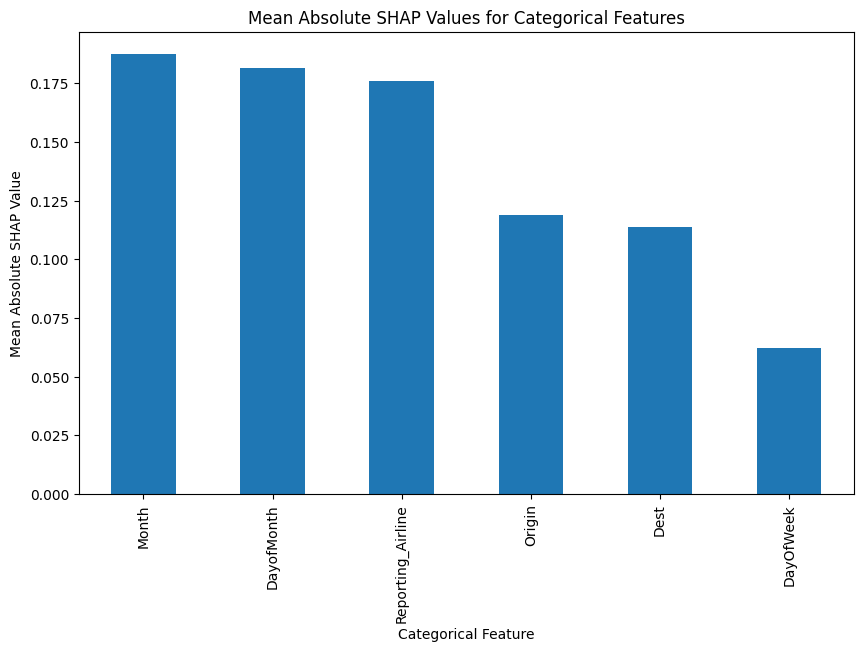

Feature: Month
  Level 1: Mean SHAP Value = -0.012419926324952233
  Level 2: Mean SHAP Value = -0.01132956949395369
  Level 3: Mean SHAP Value = -0.011379084408854052
  Level 4: Mean SHAP Value = -0.010551208662859017


Feature: DayofMonth
  Level 2: Mean SHAP Value = -0.012177531183724898
  Level 3: Mean SHAP Value = -0.015696063773038133
  Level 4: Mean SHAP Value = -0.0139017154500942
  Level 5: Mean SHAP Value = -0.013905435246134773
  Level 6: Mean SHAP Value = -0.01520791239165486
  Level 7: Mean SHAP Value = -0.014857734427945954
  Level 14: Mean SHAP Value = -0.011320849955281194
  Level 21: Mean SHAP Value = -0.01252460156158718
  Level 28: Mean SHAP Value = -0.01313978564043745
  Level 9: Mean SHAP Value = -0.012150020107069838
  Level 10: Mean SHAP Value = -0.014209945876638631
  Level 11: Mean SHAP Value = -0.013080950346011094
  Level 12: Mean SHAP Value = -0.013653311671844498
  Level 13: Mean SHAP Value = -0.01291858591060584
  Level 15: Mean SHAP Value = -0.014499023403

In [16]:
# Feature Importance for Categories
category_importance = model.get_feature_importance(type='ShapValues', data=train_pool)

# Extract shap values for categorical features
shap_values = category_importance[:, :-1]  # Last column is the mean of SHAP values per sample

# Create a summary for each categorical feature and its levels
shap_summary = pd.DataFrame(shap_values, columns=features.columns)
shap_summary = shap_summary[categorical_features]

# Calculate mean absolute SHAP value for each category
shap_mean = shap_summary.abs().mean(axis=0)

# Plotting SHAP value summary for categorical features
plt.figure(figsize=(10, 6))
shap_mean.sort_values(ascending=False).plot(kind='bar')
plt.title('Mean Absolute SHAP Values for Categorical Features')
plt.ylabel('Mean Absolute SHAP Value')
plt.xlabel('Categorical Feature')
plt.show()

# Detailed analysis for each category level
for feature in categorical_features:
    print(f"Feature: {feature}")
    feature_shap_values = shap_summary[feature]
    feature_levels = features[feature].unique()
    
    for level in feature_levels:
        mean_shap_value = feature_shap_values[features[feature] == level].mean()
        print(f"  Level {level}: Mean SHAP Value = {mean_shap_value}")

    print("\n")